In [122]:
# Import libraries
import pandas as pd
 
# read the dataset
diabetes = pd.read_csv("diabetes.csv")
 
    
# Show top 5-records
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [123]:
# split dataset in two parts: feature set and target label 
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
features = diabetes[feature_set] 
target = diabetes.label
 
# partition data into training and testing set 
from sklearn.model_selection import train_test_split
feature_train,feature_test, target_train, target_test = \
train_test_split(features, target, test_size=0.3, random_state=1)

## K-Nearest Neighbors Classification

In [124]:
# Import KNN model
from sklearn.neighbors import KNeighborsClassifier
 
# Create a KNN classifier object
model = KNeighborsClassifier(n_neighbors=33)
 
# Train the model using the training dataset
model.fit(feature_train,target_train)
 
# Predict the target variable for test dataset
predictions = model.predict(feature_test)
 
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

Accuracy: 0.8138528138528138
Precision: 0.875
Recall: 0.5764705882352941
F1-Score: 0.6950354609929078


## Confusion Matrix

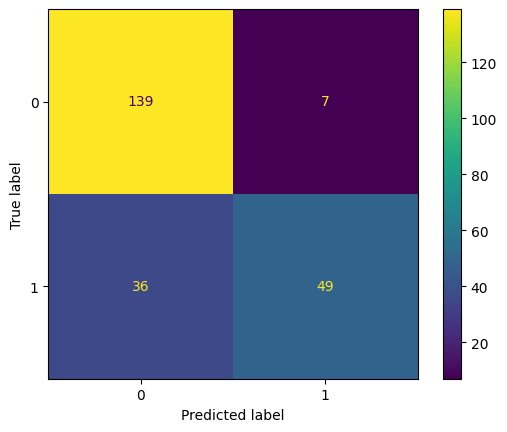

In [125]:

# Import the confusion matrix
# from sklearn.metrics import plot_confusion_matrix

# # Plot Confusion matrix
# plot_confusion_matrix(model , feature_test, target_test, values_format='d')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Your model predictions
predictions = model.predict(feature_test)

# Compute confusion matrix
cm = confusion_matrix(target_test, predictions)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


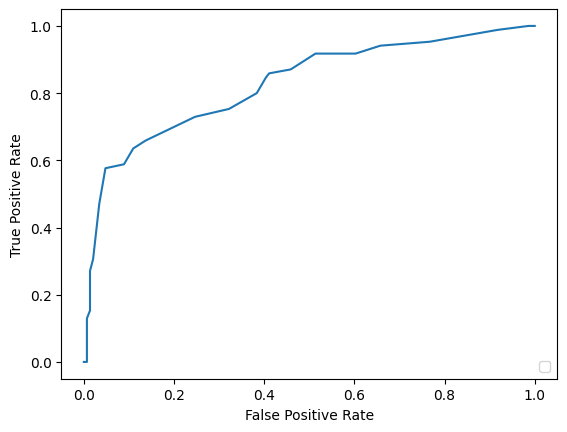

In [126]:
# predictions_prob = model.predict_proba(feature_test)[::,1]

# # import plot_roc_curve
# from sklearn.metrics import plot_roc_curve

# plot_roc_curve(model , feature_test, target_test)

from sklearn.metrics import roc_curve, RocCurveDisplay

# Assuming model, feature_test, and target_test are already defined
predictions_prob = model.predict_proba(feature_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(target_test, predictions_prob)

# Plot ROC curve
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()


In [127]:
# import ROC AUC score
from sklearn.metrics import roc_auc_score

# Compute the area under ROC curve
auc = roc_auc_score(target_test, predictions_prob)

# Print auc value
print("Area Under Curve:",auc)

Area Under Curve: 0.8271152296535053


Q1. Based on the above confusion matrix, calculate by using the correct equation: Accuracy, Precision, Recall, F1-score. Explain the meaning of the numbers you get. 

Q2. Keep modifying the number of neighbours (K) to  7, 17, 15, 21, 25, 33, can you get a higher accuracy, F1-Score? Can you get a better AUC?

Q3. Compare your results to the accuracy and AUC of Logistic Regression Model.

Q4. Write down all of your comparisons/tables/charts and answers in a document/pdf file. 

Question 1

In [128]:
tru_pos = cm[1][1]
tru_neg = cm[0][0]
fal_pos = cm[0][1]
fal_neg = cm[1][0]

accuracy = (tru_pos + tru_neg) / (tru_pos + tru_neg + fal_pos + fal_neg)
print("Accuracy:",accuracy)

precision = tru_pos / (tru_pos + fal_pos)
print("Precision:",precision)

recall = tru_pos / (tru_pos + fal_neg)
print("Recall:",recall)

f1 = 2 * precision * recall / (precision + recall)
print("F1-Score:",f1)

Accuracy: 0.8138528138528138
Precision: 0.875
Recall: 0.5764705882352941
F1-Score: 0.6950354609929078


We are 74.03% accurate that the model will get a true positive or true negative result.
The model is right 74.43% of the time.
The model was right 89.72% of the time based on how often we expected it to be right.
The f1-score indicates a high level of weight from precision and recall meaning we are expecting it to be right and it is right 81.37% of the time.
 

Question 2

n neighbors = 4 
Area Under Curve: 0.7803384367445608
Accuracy: 0.7402597402597403
Precision: 0.7443181818181818
Recall: 0.8972602739726028
F1-Score: 0.8136645962732918 <br>
n neighbors = 7
Area Under Curve: 0.7969379532634973
Accuracy: 0.7705627705627706
Precision: 0.7285714285714285
Recall: 0.6
F1-Score: 0.6580645161290323 <br>
n neighbors = 17
Area Under Curve: 0.8281627719580983
Accuracy: 0.7835497835497836
Precision: 0.7868852459016393
Recall: 0.5647058823529412
F1-Score: 0.6575342465753424 <br>
n neighbors = 15
Area Under Curve: 0.821917808219178
Accuracy: 0.7922077922077922
Precision: 0.7936507936507936
Recall: 0.5882352941176471
F1-Score: 0.6756756756756757 <br>
n neighbors = 21
Area Under Curve: 0.821917808219178
Accuracy: 0.8008658008658008
Precision: 0.8305084745762712
Recall: 0.5764705882352941
F1-Score: 0.6805555555555555 <br>
n neighbors = 25
Area Under Curve: 0.8210717163577759
Accuracy: 0.7748917748917749
Precision: 0.8235294117647058
Recall: 0.49411764705882355
F1-Score: 0.6176470588235294 <br>
n neighbors = 33
Area Under Curve: 0.8271152296535053
Accuracy: 0.8138528138528138
Precision: 0.875
Recall: 0.5764705882352941
F1-Score: 0.6950354609929078

as we change the quantity of neighbors we can see an improvement in varying values, the AUC doesn't significantly increase after increasing k to >= 15 however the fscore, recall, precicsion and accuracy seem to flucuate given any amount of k.

Question 3

In [129]:
# Import libraries
import pandas as pd
 
# read the dataset
diabetes = pd.read_csv("diabetes.csv")

# split dataset in two parts: feature set and target label 
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
features = diabetes[feature_set] 
target = diabetes.label

from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1)

# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # for performance evaluation
 
# instantiate the model
logreg = LogisticRegression(solver='lbfgs')
 
# fit the model with data
logreg.fit(feature_train,target_train)
 
# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)
#print(abs(predictions - target_test))

 
# Assess model performance using accuracy measure
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(target_test, predictions)
print (cnf_matrix)
print("Accuracy:",metrics.accuracy_score(target_test, predictions))

print ("F1: ", metrics.f1_score(target_test, predictions, average='binary'))
auc = roc_auc_score(target_test, predictions_prob)

# Print auc value
print("Area Under Curve:",auc)

[[132  14]
 [ 36  49]]
Accuracy: 0.7835497835497836
F1:  0.6621621621621621
Area Under Curve: 0.8271152296535053


(Logistic Regression)[[132  14]
 [ 36  49]]
Accuracy: 0.7835497835497836
F1:  0.6621621621621621
Area Under Curve: 0.8271152296535053 <br>
vs<br>
(K model)
[[139 7]
 [36 49]]
Accuracy: 0.8138528138528138
F1-Score: 0.6950354609929078
Area Under Curve: 0.8271152296535053
The two confusion matrices look very similar however the AUC of both models is the same. While the k model might be more accurate they but the k model is more accurate more of the time given the higher f1-score (given k = 33).